A1.Find the first derivative of your speech signal with finite difference method. Listen to the first derivative signal and the original speech signal.

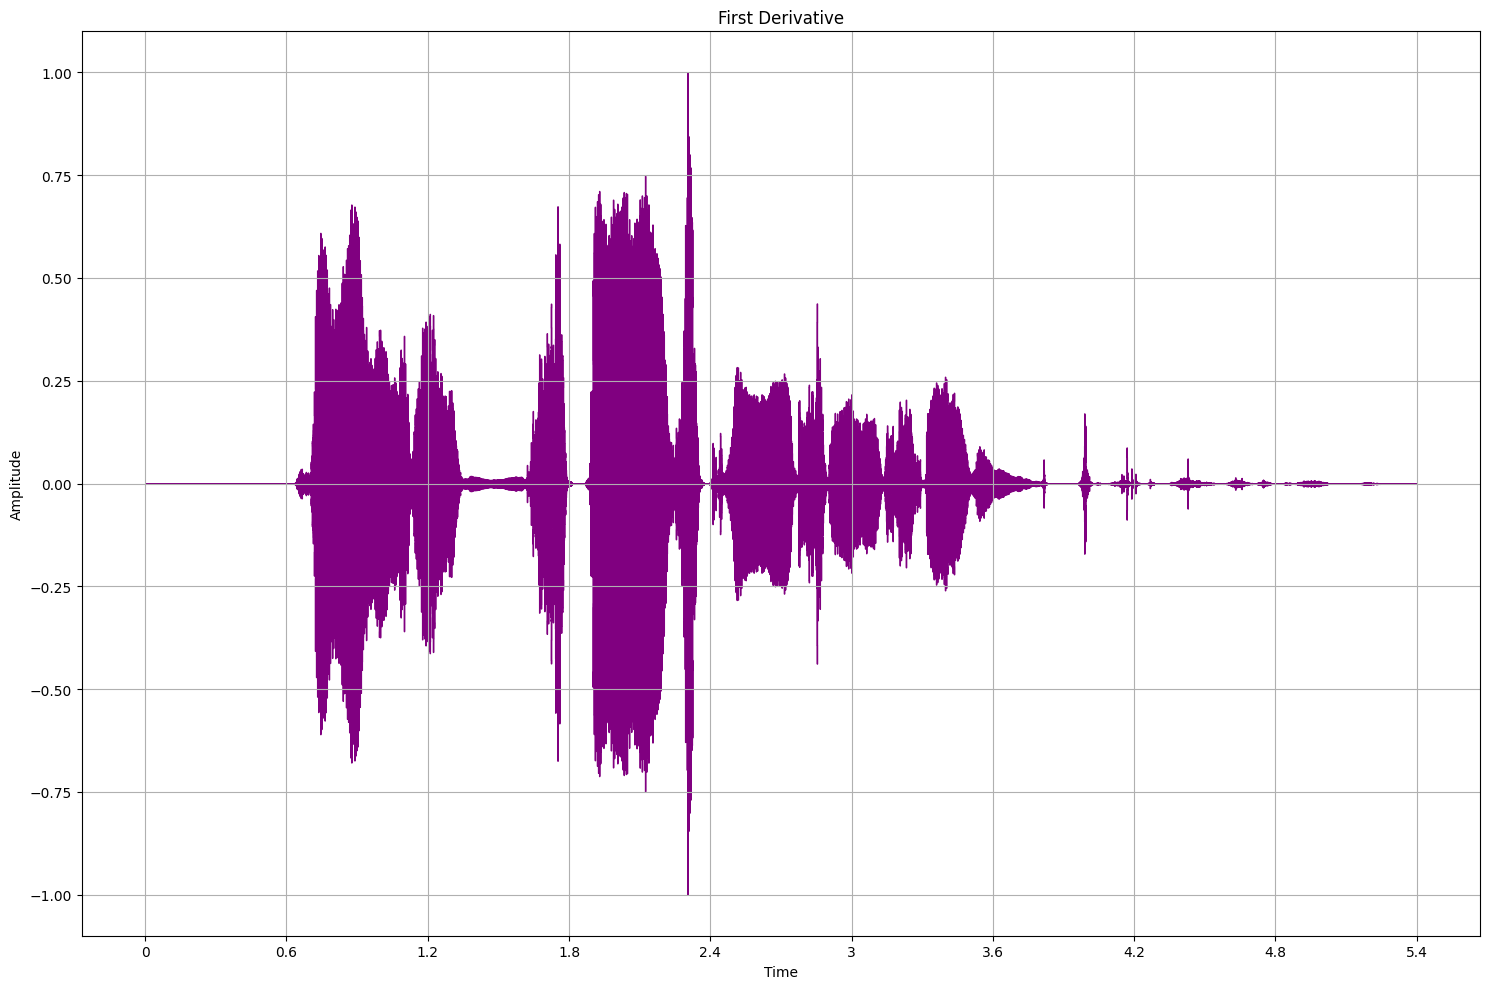

Playing first derivative signal


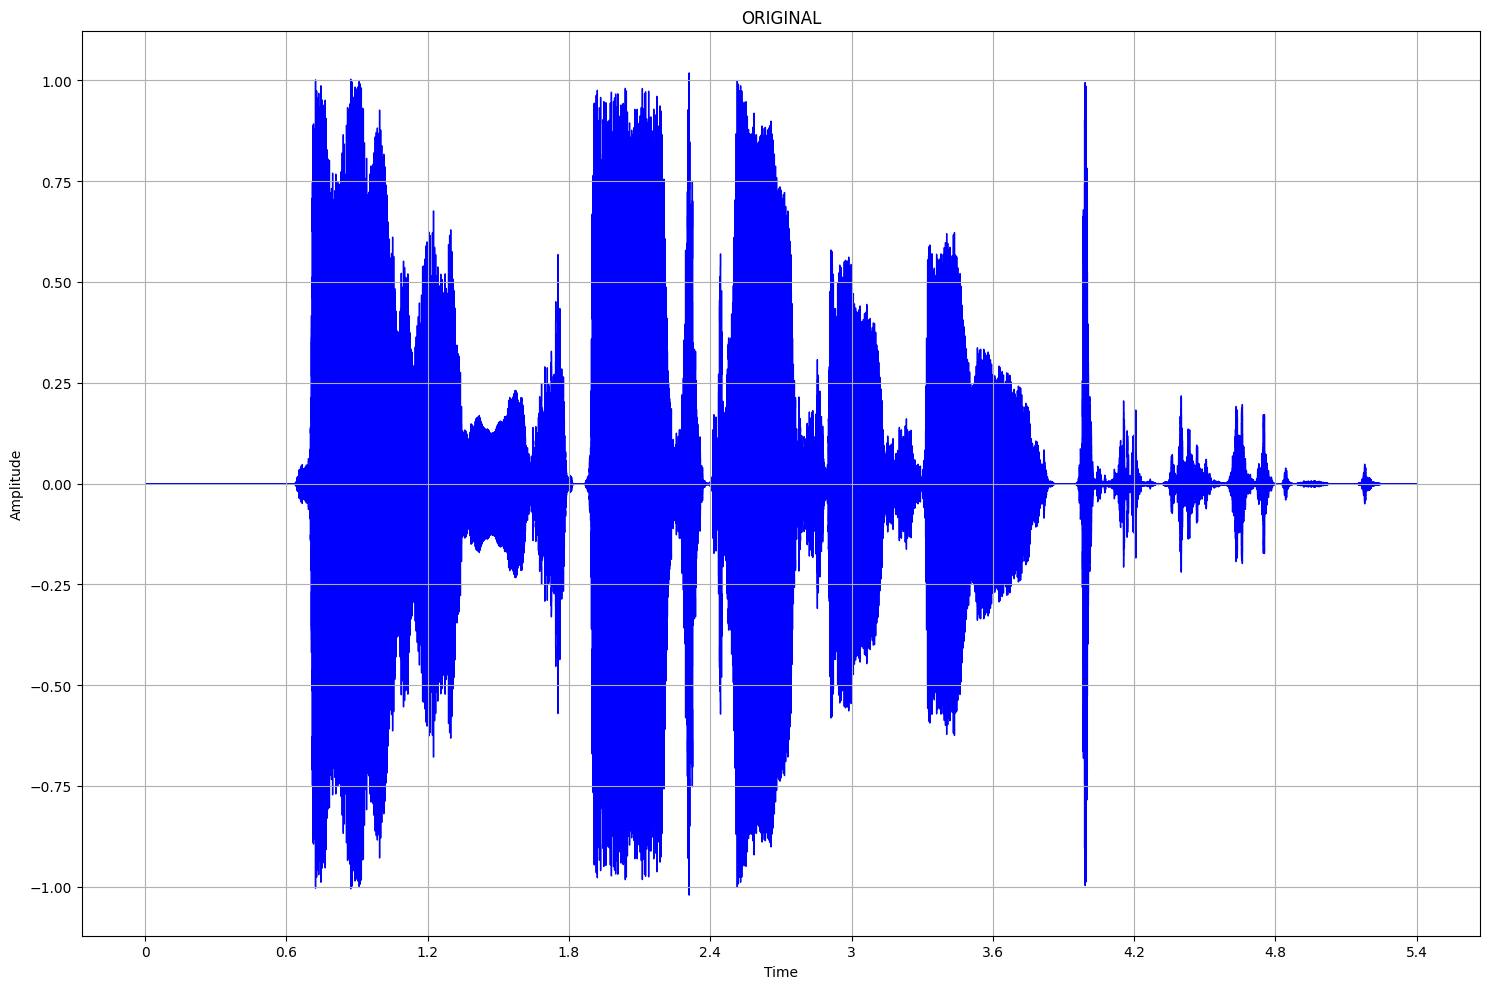

Playing original speech signal


In [25]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
import IPython.display as ipd

y, sr = librosa.load('/content/Recording (2).mp3')

derivative_1 = np.diff(y)
derivative_1 /= np.max(np.abs(derivative_1))

plt.figure(figsize=(15, 10))
librosa.display.waveshow(derivative_1, sr=sr, color='purple')
plt.title('First Derivative')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()

print("Playing first derivative signal")
ipd.display(ipd.Audio(derivative_1, rate=sr))

plt.figure(figsize=(15, 10))
librosa.display.waveshow(y, sr=sr,color='blue')
plt.title('ORIGINAL')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.grid(True)
plt.tight_layout()
plt.show()
ipd.Audio(y, rate=sr)


print("Playing original speech signal")
ipd.display(ipd.Audio(y, rate=sr))



A2. Detect the points of zero crossing in the first derivative signal. Compare the average length between two consecutive zero crossings for speech and silence regions. Observe the pattern.


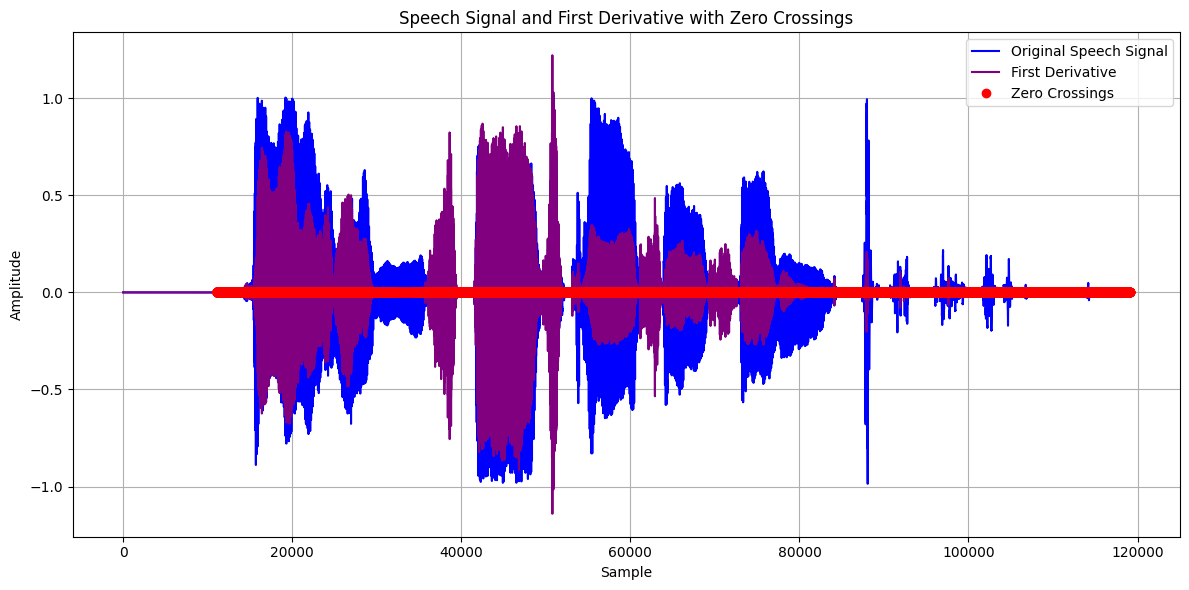

Average length between consecutive zero crossings in speech regions: 3.2260550129916674


In [28]:

import numpy as np
import librosa
import matplotlib.pyplot as plt

# Load the speech signal
y, sr = librosa.load('/content/Recording (2).mp3')

# Calculate the first derivative
derivative_1 = np.diff(y)

# Find zero crossings
zero_crossings = np.where(np.diff(np.sign(derivative_1)))[0]

# Plot the original signal, first derivative, and zero crossings
plt.figure(figsize=(12, 6))
plt.plot(y, label='Original Speech Signal', color='blue')
plt.plot(derivative_1, label='First Derivative', color='purple')
plt.plot(zero_crossings, np.zeros_like(zero_crossings), 'ro', label='Zero Crossings')
plt.title('Speech Signal and First Derivative with Zero Crossings')
plt.xlabel('Sample')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Function to differentiate regions
def differentiate_regions(signal):
    threshold = 10
    regions = []
    current_region = []
    for i, value in enumerate(signal):
        if abs(value) > threshold:
            if current_region:
                regions.append(current_region)
                current_region = []
        else:
            current_region.append(i)
    return regions

# Differentiate speech and silence regions
speech_regions = differentiate_regions(y)

# Calculate average length between consecutive zero crossings in speech regions
avg_length_speech = average_length_between_zero_crossings(zero_crossings)

# Print the result
print("Average length between consecutive zero crossings in speech regions:", avg_length_speech)


A3. Speak 5 of your favoritewords. Observe the length of the speech signals. Compare the lengths of your spoken words with those of your project team-mate.

Lengths of the spoken words mahati: [1.63, 2.14, 2.33, 1.68, 1.43]
Lengths of the spoken words gokulan: [2.56, 2.98, 3.41, 2.71, 2.43]


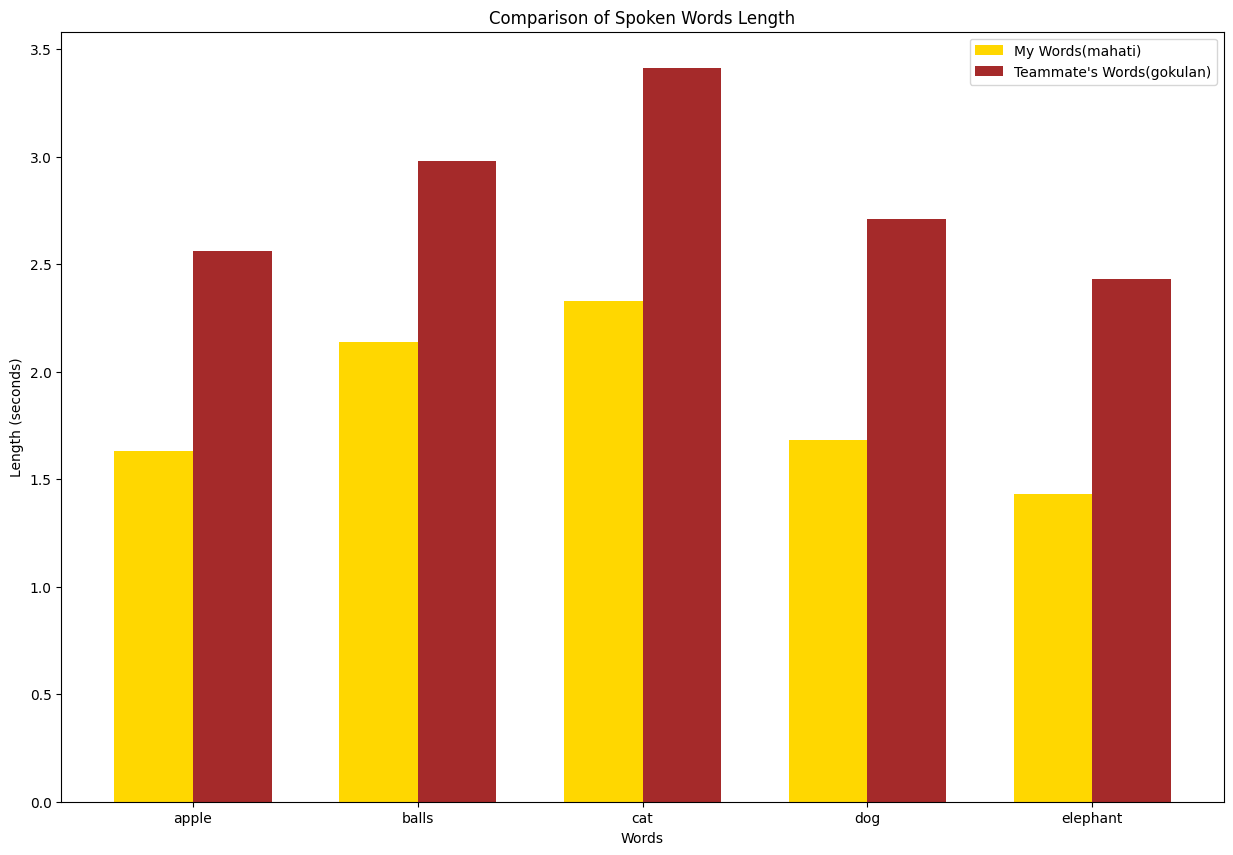

In [34]:
word_files_mahati = ['apple.wav','balls.wav','cat.wav','dog.wav','elephant.wav']
word_files_gokulan = ['appleg.wav','ballsg.wav','catg.wav','doggog.wav','elephantg.wav']
words = ['apple', 'balls', 'cat', 'dog', 'elephant']
word_lengths_mahati = []
word_lengths_gokulan = []

for word_file in word_files_mahati:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_mahati.append(length_seconds)

for word_file in word_files_gokulan:
    signal, sr = librosa.load(word_file, sr=None)
    length_seconds = len(signal) / sr
    word_lengths_gokulan.append(length_seconds)

print("Lengths of the spoken words mahati:", word_lengths_mahati)
print("Lengths of the spoken words gokulan:", word_lengths_gokulan)

bar_width = 0.35
index = np.arange(len(words))
plt.figure(figsize=(15, 10))
plt.bar(index - bar_width/2, word_lengths_mahati, bar_width, label='My Words(mahati)', color='Gold')
plt.bar(index + bar_width/2, word_lengths_gokulan, bar_width, label="Teammate's Words(gokulan)", color='Brown')
plt.xlabel('Words')
plt.ylabel('Length (seconds)')
plt.title('Comparison of Spoken Words Length')
plt.xticks(index, words)
plt.legend()

plt.show()


A4. Select a sentence which can be used for making a statement or asking a question. Ex: “You are going to college on Sunday(./?)”. Record two signals –one with making the statement while other with asking question. Study the two signals and compare them.

Question Signal:
statement Signal:


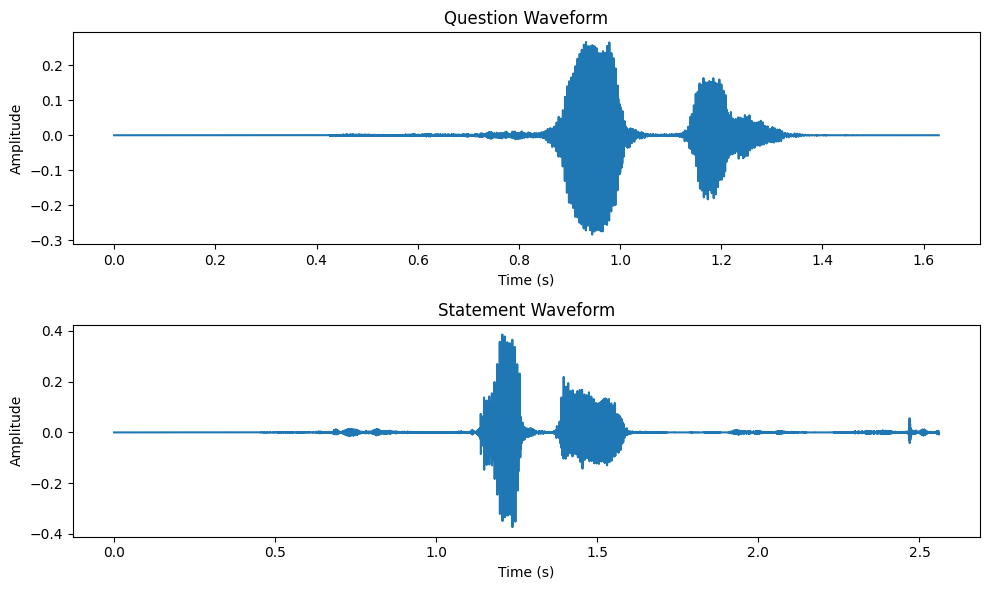

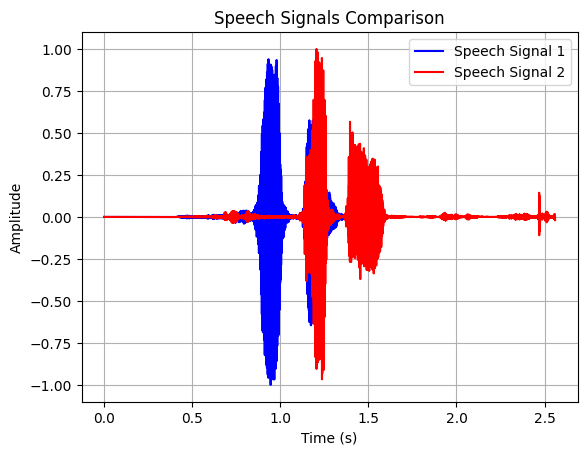

In [35]:
import numpy as np
import scipy.signal as signal
import librosa

import matplotlib.pyplot as plt
from IPython.display import Audio

speech_signal1, sample_rate1 = librosa.load('apple.wav')
speech_signal2, sample_rate2 = librosa.load('appleg.wav')

print("Question Signal:")
Audio(speech_signal1, rate=sample_rate1)

print("statement Signal:")
Audio(speech_signal2, rate=sample_rate2)

plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(np.arange(len(speech_signal1)) / sample_rate1,speech_signal1 )
plt.title('Question Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.subplot(2, 1, 2)
plt.plot(np.arange(len(speech_signal2)) /sample_rate2 ,speech_signal2 )
plt.title('Statement Waveform')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

speech_signal1 = speech_signal1.astype(np.float32) / np.max(np.abs(speech_signal1))
speech_signal2 = speech_signal2.astype(np.float32) / np.max(np.abs(speech_signal2))

time1 = np.linspace(0, len(speech_signal1) / sample_rate1, len(speech_signal1))
time2 = np.linspace(0, len(speech_signal2) / sample_rate2, len(speech_signal2))

plt.plot(time1, speech_signal1, color='blue', label='Speech Signal 1')
plt.plot(time2, speech_signal2, color='red', label='Speech Signal 2')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title('Speech Signals Comparison')
plt.legend()
plt.grid(True)
plt.show()